<a href="https://colab.research.google.com/github/maryamnaeem786/Maryam-Naeem-s-Projects/blob/main/Copy_of_Bank_fraudulent_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description

In this task, we will use a machine learning algorithm to detect fraudulent bank transactions. We will use a publicly available dataset downloaded from Kaggle. First, we will perform some basic data visualization, followed by the necessary preprocessing. During preprocessing, we will balance both classes to ensure that our model does not learn any biases. Next, we will create a simple neural network model containing two hidden layers. We will train the model and subsequently evaluate its performance. Finally, we will explore some model interpretability techniques, specifically using SHAP to gain insights into how the model makes its predictions.


#Mount Google Drive for Data Access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Unzip the archive containing the data
!unzip -q /content/gdrive/MyDrive/creditcard.csv.zip

#Importing Packages

In [ ]:
# To load data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn

# frameworks to create neural networks
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for visualizations
sns.set_theme(style='whitegrid')

#Load and Explore the Dataset

In [ ]:
# Read data file
df = pd.read_csv("creditcard.csv")

# Print some data entries
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


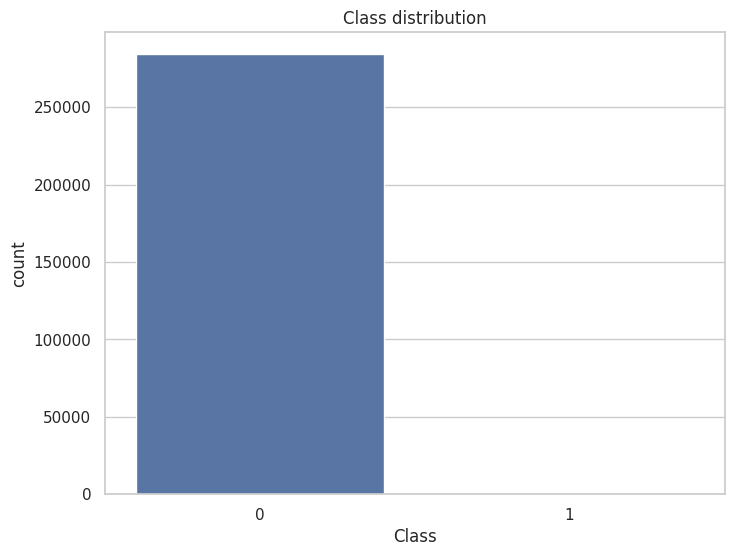

In [ ]:
# Explore the count in each class
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x='Class', data=df)
plt.title("Class distribution");

Since class 0 which is the non-fraudulent class has more examples, this creates a class imbalance which needs to be mitigated in order to prevent the algorithim from bias.

In [ ]:
# Checking missing values
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

#Pre-processing the dataset

In [ ]:
# Separate features and labels
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
# Normalize data features using standard scaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
# Use SMOTE to balance both the classes by oversampling the minority class
smote = imblearn.over_sampling.SMOTE()
X_blnc, Y_blnc  = smote.fit_resample(X_norm, Y)

In [ ]:
# Create training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_blnc, Y_blnc, test_size=0.2)

#Model Designing

In [ ]:
# Use keras sequential API to create the model
model = keras.Sequential()
# hidden layers
model.add(keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
# output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

# print model summary
model.summary()

# Compile the model with loss, optimizer and evaluation metrics.
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


#Model Training

In [ ]:
# Model training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, verbose=1, batch_size=32)

Epoch 1/3
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 2/3
14216/14216 [==============================] - 32s 2ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 3/3
14216/14216 [==============================] - 31s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9990


Text(0.5, 1.0, 'Loss plot')

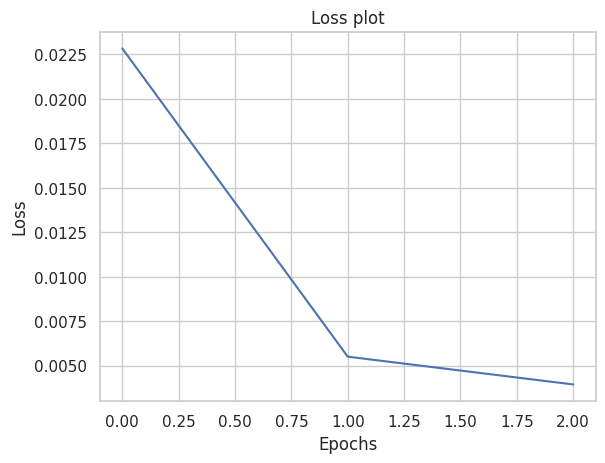

In [ ]:
# Plot loss and accuracy vs epochs
sns.set_theme(style='whitegrid')
plt.plot(range(3), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss plot')

Text(0.5, 1.0, 'Model accuracy')

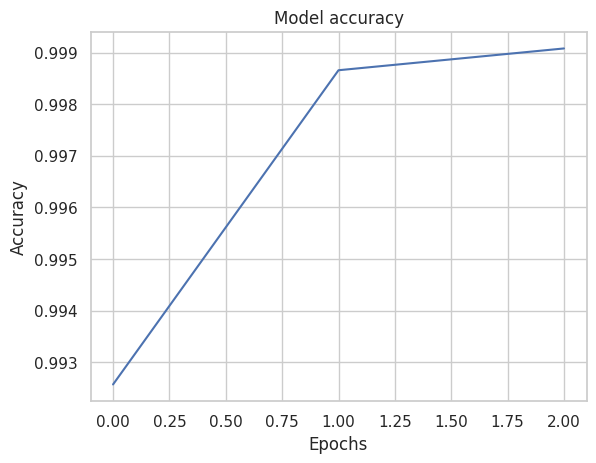

In [ ]:
# Accuracy vs epochs
sns.set_theme(style='whitegrid')
plt.plot(range(3), history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model accuracy")

#Model Evaluation

In [ ]:
# Use the train model to make predictions for the test set
y_pred = model.predict(X_test)

# Set the decision threshold at 0.5
y_pred_labels = y_pred > 0.5

3554/3554 [==============================] - 5s 1ms/step


In [ ]:
# Print classification report containing accuracy, precision, recall and f1 score
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56830
           1       1.00      1.00      1.00     56896

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



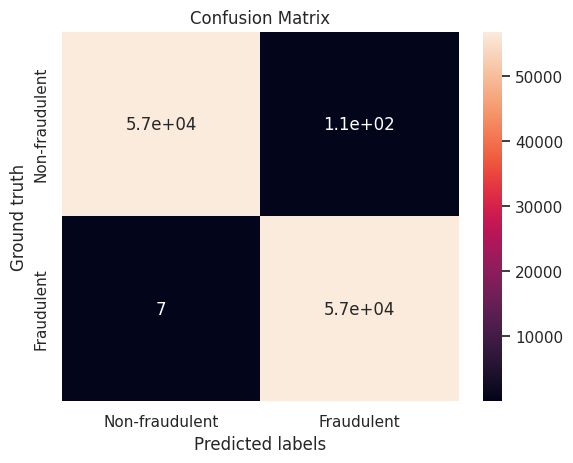

In [ ]:
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

# Plot the  confusion matrix using a heatmap
sns.heatmap(conf_mat, yticklabels=["Non-fraudulent", "Fraudulent"], xticklabels=["Non-fraudulent", "Fraudulent"], annot=True)
plt.xlabel("Predicted labels")
plt.ylabel("Ground truth")
plt.title("Confusion Matrix");

#Model Interpretability

In [ ]:
# Install and import the shap package
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.9 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# The test size is huge. I am creating a small subset of it to do our shap analysis on it.
x_test_subset = X_test[:100]
y_test_subset = y_test[:100]

In [ ]:
# Calculate shap values
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(x_test_subset)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


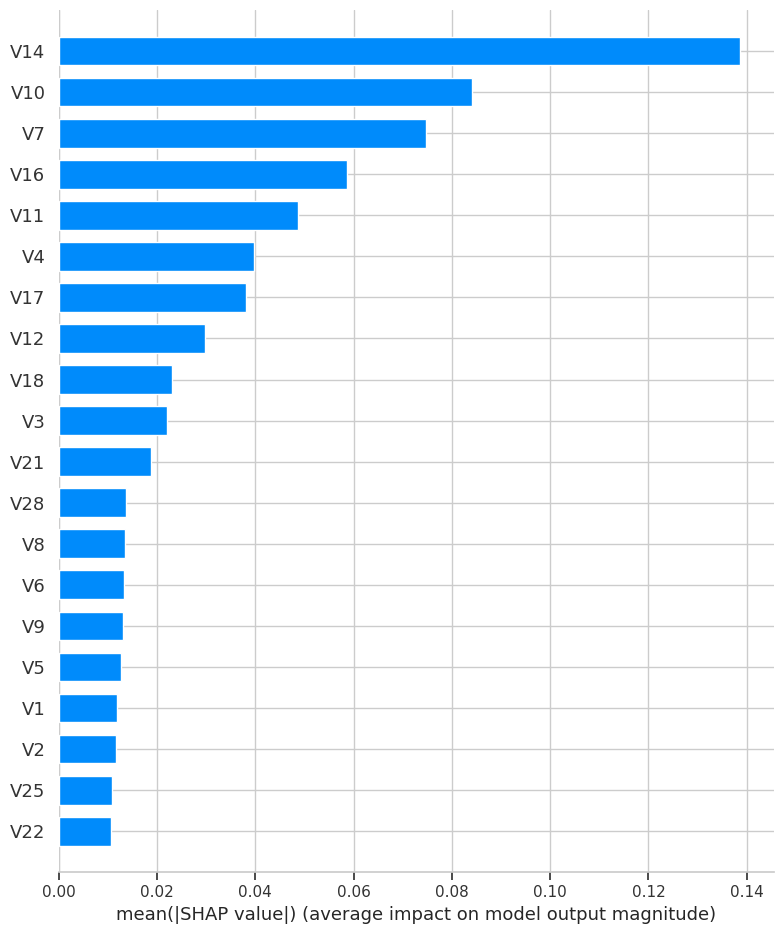

In [ ]:
# Visualizing global feature importance using summary plot
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = df.columns[:-1])

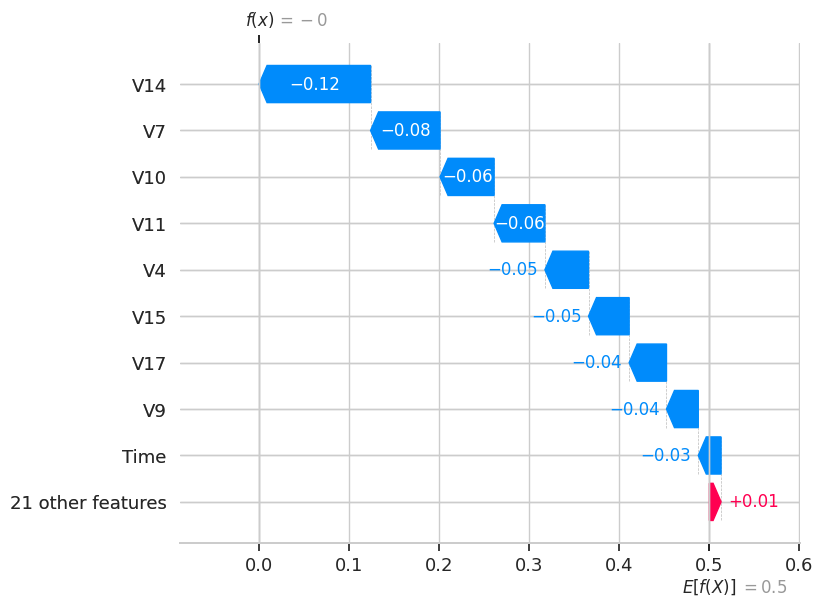

In [ ]:
# Visualizing each feature's impact on decision using waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = df.columns[:-1])

In [ ]:
# Feature importance using force plot
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = df.columns[:-1])

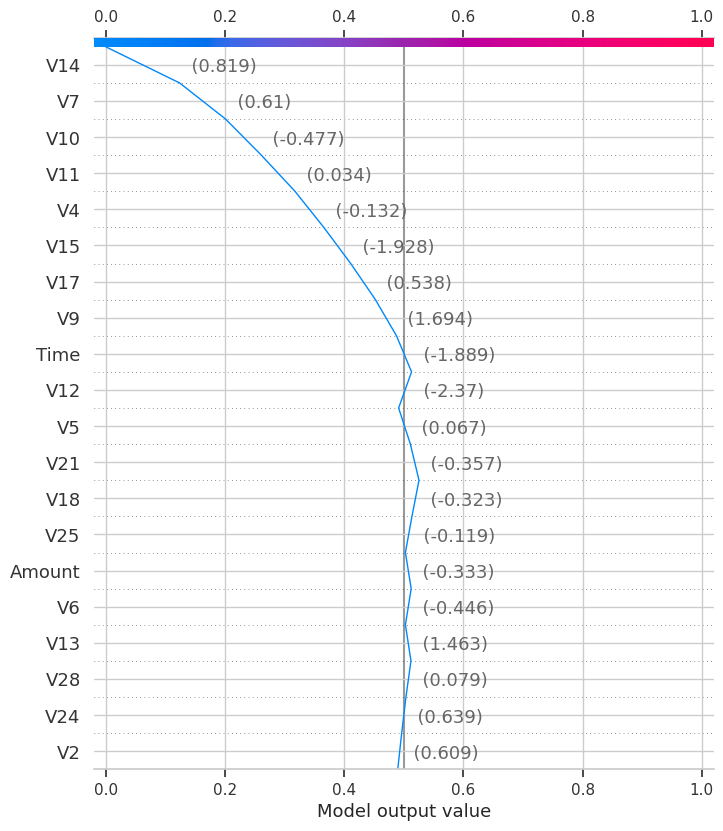

In [ ]:
# Observing features contribution into the final decision using the decision plot
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test_subset[0], feature_names = df.columns[:-1].to_numpy())